In [39]:
from __future__ import print_function, division

from IPython.core.display import Image, HTML

import numpy as np
import pandas as pd
from time import time

from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
%matplotlib inline

PATH = '.assets/images/'

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) <br>Advanced Unsupervised Learning Methods
Week 7 | Lesson 5.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand the curse of dimensionality
- Identify additional unsupervised learning methods
- Explain how these methods differ from other unsupervised methods

## What we talked about this week:

We discussed how to reduce the dimensionality of our data and some methods that can be used to do that

## Let's review why we want to do dimensionality reduction
<br>
<br>
## Why do we do it?

## Benefits:

- Reduce memory requirements
- Decrease model runtime
- Eliminate non-informative features
- Reduce multi-collinearity
- Allow for visualization

## But there is one more:

- Avoid the **curse of dimensionalty** 

In [37]:
Image(url='http://s2.dmcdn.net/CnE2O/1280x720-3-5.jpg', width=500)

## What is the curse of dimensionality?

## As we increase the number of dimensions (feature space), we effectively increase the "empty space" that our samples "live in"

## Example

- Taken from  http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

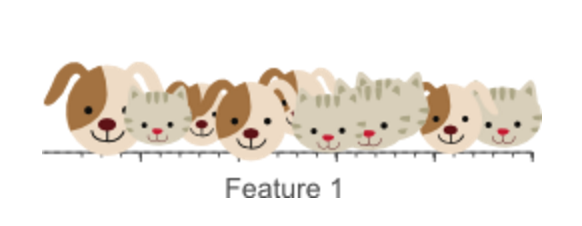

In [40]:
Image(PATH + '1d.png')

## Add a dimension

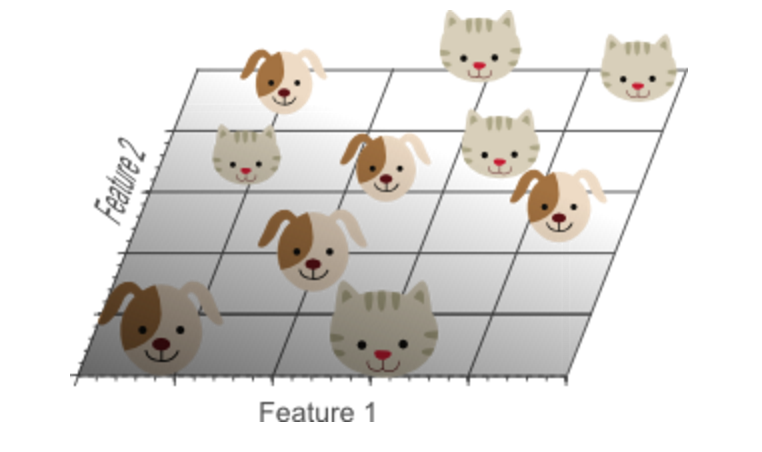

In [41]:
Image(PATH + '2d.png')

## And another

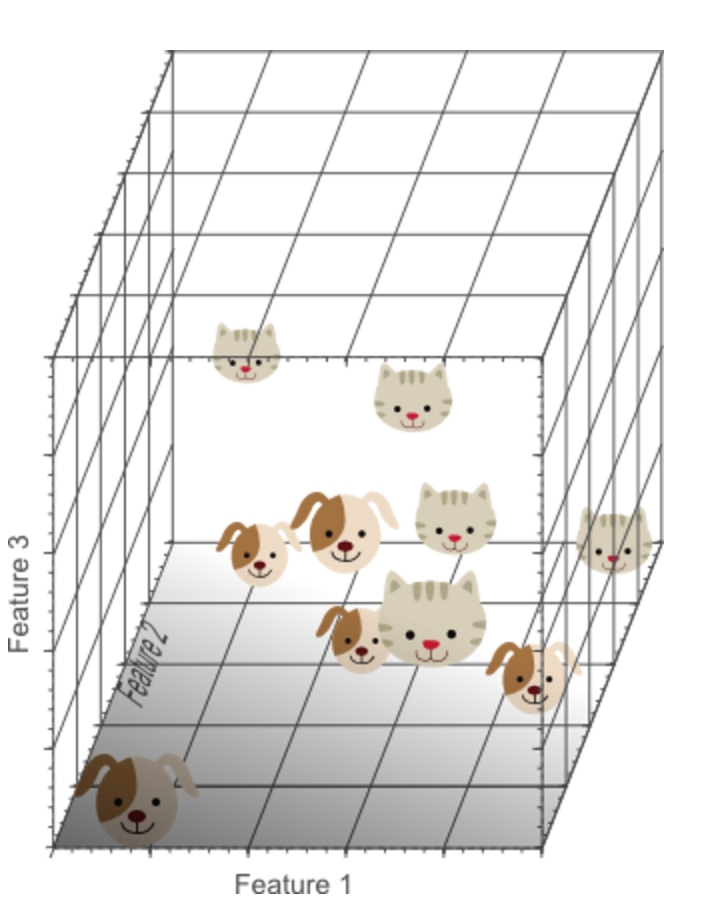

In [42]:
Image(PATH + '3d.png')

## Can now separate

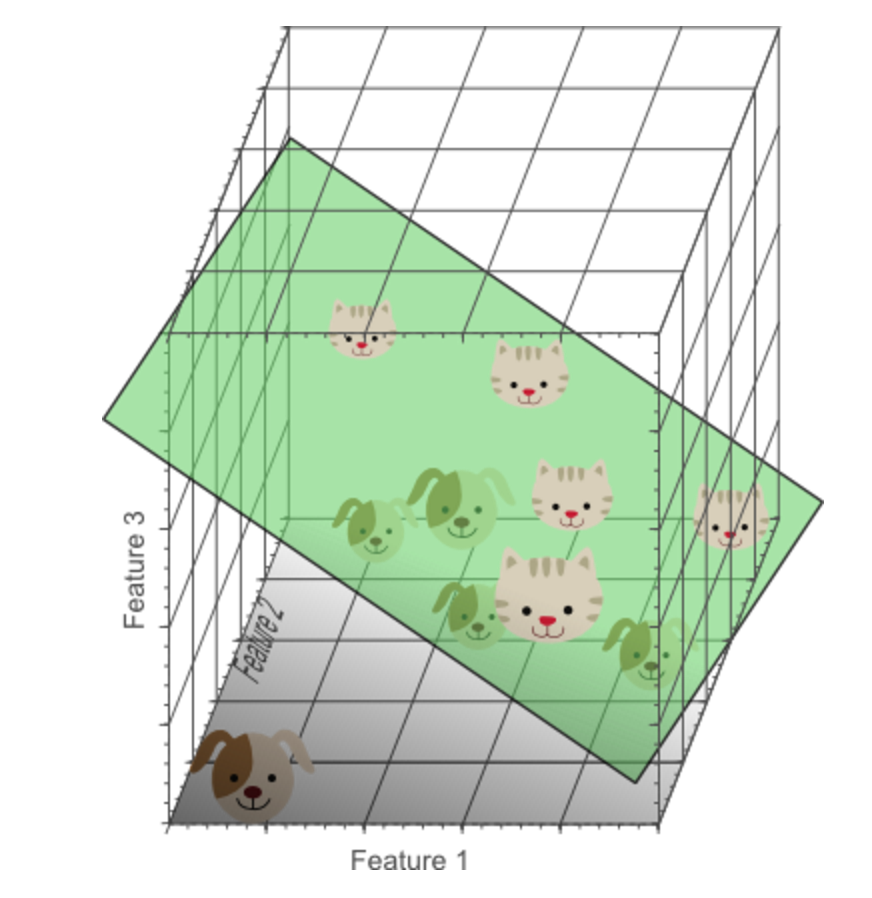

In [43]:
Image(PATH + 'hyperplane.png')

## But as we go on and on...

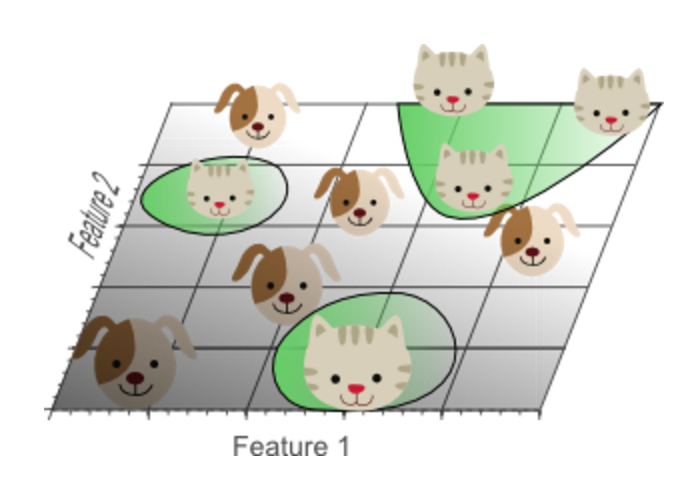

In [44]:
Image(PATH + 'overfit.png')

## We have overfit our data as a consequence of the curse of dimensionality


## Does it hurt all classifiers equally?

## No.

>  "Classifiers that tend to model non-linear decision boundaries very accurately (e.g. neural networks, KNN classifiers, decision trees) do not generalize well and are prone to overfitting. Therefore, the dimensionality should be kept relatively low when these classifiers are used. If a classifier is used that generalizes easily (e.g. naive Bayesian, linear classifier), then the number of used features can be higher since the classifier itself is less expressive."

## There is a corollary to the curse of dimensionality, however, known as the "blessing of non-uniformity"

> "In most applications examples are not spread uniformly throughout
the instance space, but are concentrated on or near
a **lower-dimensional manifold**. For example, k-nearest neighbor
works quite well for handwritten digit recognition even
though images of digits have one dimension per pixel, because
the space of digit images is much smaller than the
space of all possible images." -Pedro Domingos

## This is exactly what we'll be discussing today

## The methods we've discussed this week:

- K-Means Clustering
- Hierarchical Clustering
- DBSCAN
- PCA

## What we haven't discussed this week:

- t-SNE
- Isomaping
- Multi-Dimensional Scaling
- Modified Local Linear Embedding (MLLE)
- Random Projections
- Spectral Embedding
- Local Tangent Space Alignment
- Autoencoders
- ...

## So, we're going to cover all of those in detail, right?

## No.

## But...

## We're going to have a brief tour of them so that you have some familiarity with them and how they work

## Ok, so how does this manifold thing work?

## You know what this is

In [52]:
Image(url='http://www.dbtechnology.co.uk/images/globe.jpg')

## So how do we make it look like this?

In [53]:
Image(url='https://stuff.mit.edu/afs/athena/system/amd64_deb50/os/usr/share/gnome-panel/pixmaps/world_map-960.png')

## So there are a lot of ways to do that...

In [51]:
Image(url='https://imgs.xkcd.com/comics/map_projections.png', height=600)

## So manifold learning is the same idea conceptually

Also known as multi-dimensional scaling, embedding, dimensionality reduction...

## We want to map a higher dimensional representation to a lower dimensional one

## The key is to represent the data such that the distances in the lower dimensional representation are representative of the distances in the higher dimensional data.

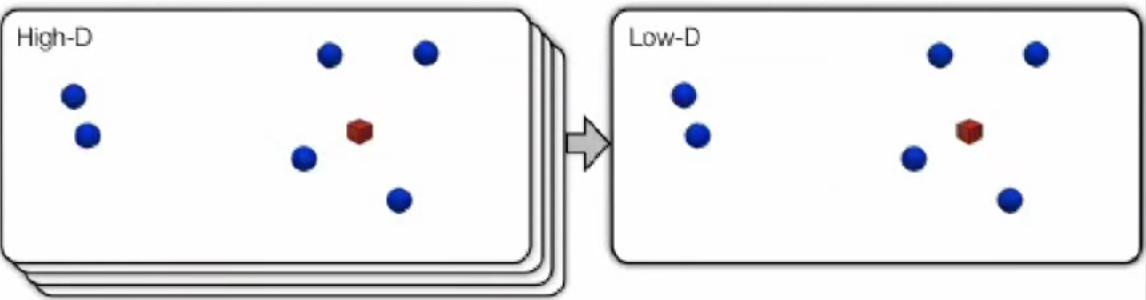

In [57]:
Image(PATH + 'highd.png')

## Well  great, but how?

## By mininizing some cost function that measures the similarities of the data in the higher dimension and the lower dimensional map

## Wait, but I thought that was PCA?

## Yes, PCA reduces features to <em>linear combination</em> of higher dimensional features

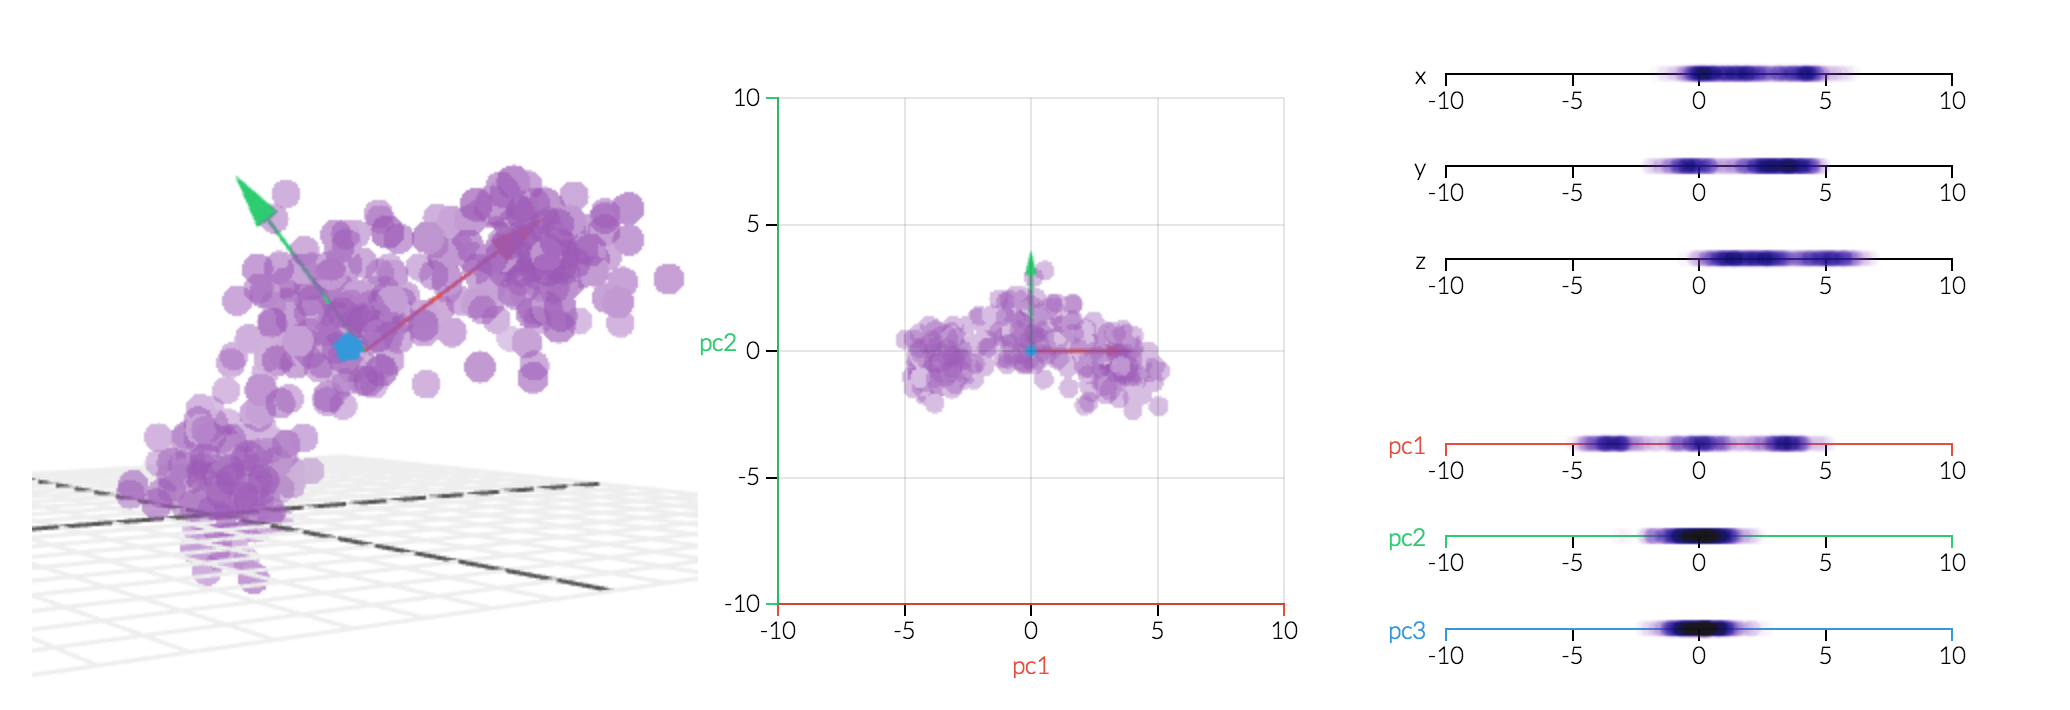

In [54]:
Image(PATH + 'pca.png')

## But PCA is not necessarily the best representation for all scenarios

## If our data is non-linear...

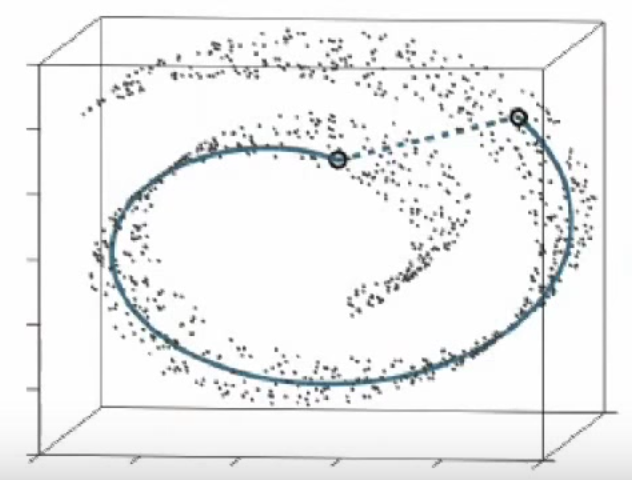

In [58]:
Image(PATH + 'swiss.png')

## PCA seeks to maximize variance (min sq. errors) which tends to preserve large pairwise distances

## Doesn't tend to produce the best mapping in lower dimensions

In [45]:
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [29]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure(figsize=(15,8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing PCA projection


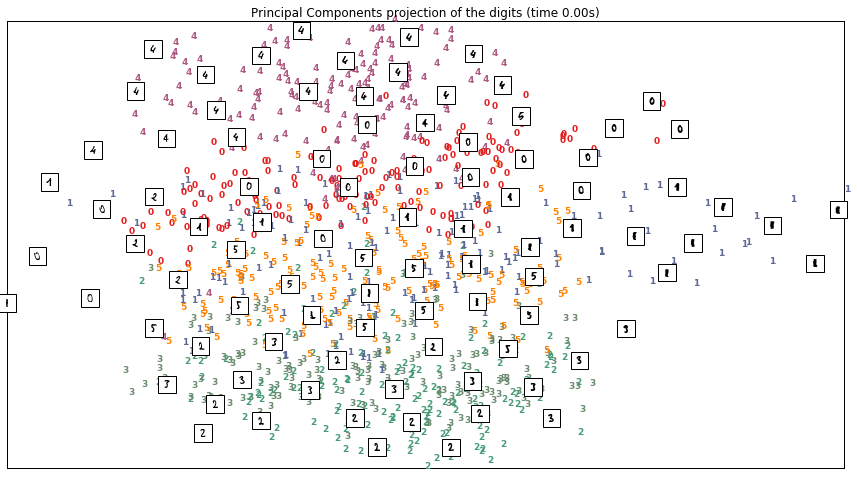

In [30]:
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

## So what does work?

## Local distances 

## Enter Isomapping

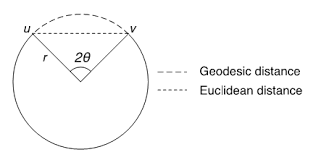

In [60]:
Image(PATH + 'geod.png')

Computing Isomap embedding
Done.


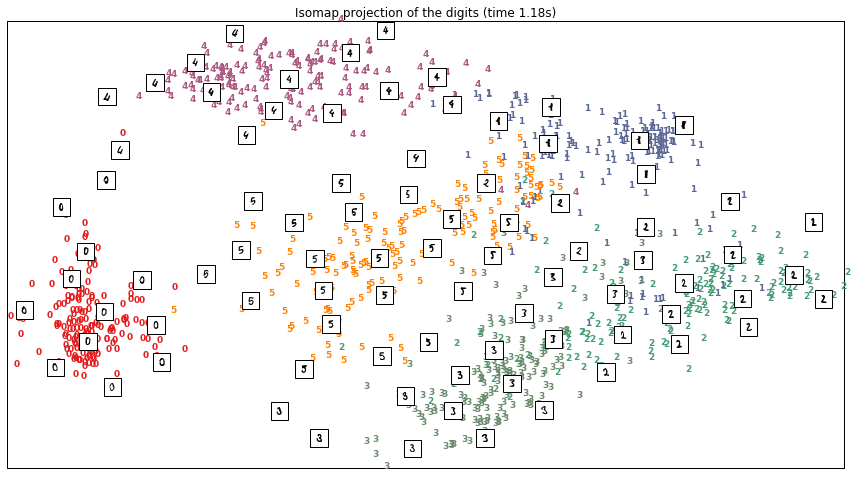

In [59]:
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

## Better, but still not quite there...

## Enter t-SNE

## t-SNE uses gradient descent on something called the KL divergence - The effect of this is to keep things that are close in high dimensional space to be close in low dimensional space, but things that are far are allowed to be even further apart

Computing t-SNE embedding


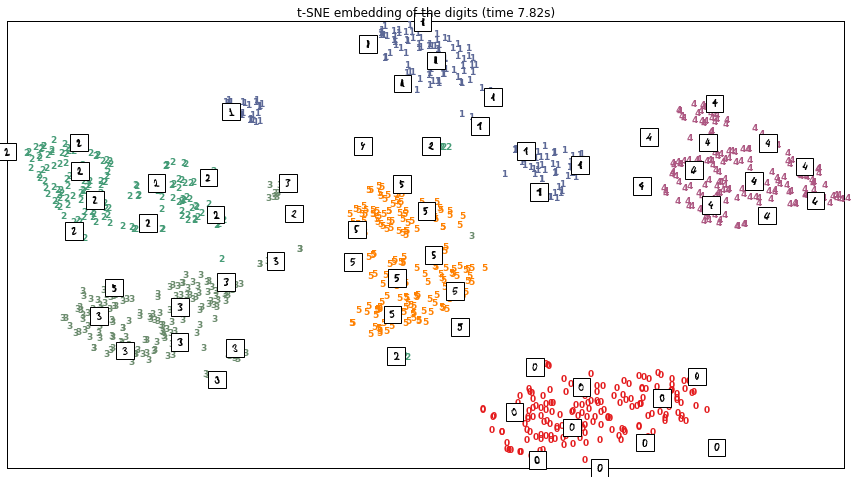

In [31]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

## Independent Practice

Check out the sklearn documentation on manifold learning in sk-learn and using one of the datasets we've worked with (iris, airport delays, wine data, etc.) compare and contrast the results using PCA and t-SNE. Which produces the best result?

[Manifold Learning](http://scikit-learn.org/stable/modules/manifold.html#manifold)